In [35]:
#Import Dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [38]:
#Paths to CSV
original_electric_vehicles_csv = "./OriginalDatasets/MD_MDOT_MVA_Electric_and_Plug-in_Hybrid_Vehicle_Registrations_by_Zip_Code_as_of_Each_Month_End_from_July_2020_to_July_2023.csv"
original_maryland_zipcode_csv = "./OriginalDatasets/Zip_Code_Lookup_Table.csv"
original_charging_stations_csv = "./OriginalDatasets/alt_fuel_stations (Sep 21 2023).csv"

In [39]:
#Clean Charging stations Dataset
charging_stations_df = pd.read_csv(original_charging_stations_csv)
charging_stations_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV On-Site Renewable Source,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class
0,ELEC,Municipal Garage,200 N Holliday St,NaN,Baltimore,MD,21202,NaN,443-573-2800,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
1,ELEC,Bel Air Nissan,1506 Bel Air Rd,NaN,Bel Air,MD,21014,NaN,410-879-1133,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
2,ELEC,Community College of Baltimore County (CCBC),800 S Rolling Rd,Lot 8,Catonsville,MD,21228,NaN,443-840-2222,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
3,ELEC,Younger Nissan,7418 Grove Rd,NaN,Frederick,MD,21704,NaN,301-662-0111,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD
4,ELEC,Criswell Nissan,19574 Amaranth Dr,NaN,Germantown,MD,20874,NaN,301-670-3900,E,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
charging_stations_df['Groups With Access Code'].unique()

array(['Public', 'Public - Call ahead', 'Private - Government only',
       'Private', 'Public - Credit card at all times'], dtype=object)

In [41]:
#Rename differet Public charging stations into one
replace_dict = {'Public - Call ahead': 'Public', 'Public - Credit card at all times': 'Public'}
charging_stations_df['Groups With Access Code'] = charging_stations_df['Groups With Access Code'].replace(replace_dict)
charging_stations_df.groupby("Groups With Access Code").size()

Groups With Access Code
Private                        98
Private - Government only      27
Public                       1524
dtype: int64

In [42]:
#Filter only Public charging stations
public_charging_stations_df = pd.DataFrame(charging_stations_df[charging_stations_df['Groups With Access Code']=='Public'])
public_charging_stations_df['Groups With Access Code'].unique()

array(['Public'], dtype=object)

In [43]:
#Take only useful columns
short_public_charging_stations_df = public_charging_stations_df[['Fuel Type Code','Station Name','Groups With Access Code','Street Address','City','State','ZIP', 'Latitude','Longitude']]
short_public_charging_stations_df.head()

,Fuel Type Code,Station Name,Groups With Access Code,Street Address,City,State,ZIP,Latitude,Longitude
0,ELEC,Municipal Garage,Public,200 N Holliday St,Baltimore,MD,21202,39.291785,-76.610539
1,ELEC,Bel Air Nissan,Public,1506 Bel Air Rd,Bel Air,MD,21014,39.505659,-76.382317
2,ELEC,Community College of Baltimore County (CCBC),Public,800 S Rolling Rd,Catonsville,MD,21228,39.256947,-76.730918
3,ELEC,Younger Nissan,Public,7418 Grove Rd,Frederick,MD,21704,39.391175,-77.407835
4,ELEC,Criswell Nissan,Public,19574 Amaranth Dr,Germantown,MD,20874,39.177414,-77.249773


In [44]:
#Rename and order columns
short_public_charging_stations_df.rename(columns={'ZIP': 'ZipCode',
                                                  'Fuel Type Code': 'Program',
                                                  'Groups With Access Code': 'Access',
                                                  'Street Address': 'Address'},
                                         inplace=True)
clean_public_charging_stations_df=short_public_charging_stations_df[['Program','Access','State','City','Address','ZipCode','Latitude','Longitude']]
clean_public_charging_stations_df.head()

/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_29790/424427659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_public_charging_stations_df.rename(columns={'ZIP': 'ZipCode',


,Program,Access,State,City,Address,ZipCode,Latitude,Longitude
0,ELEC,Public,MD,Baltimore,200 N Holliday St,21202,39.291785,-76.610539
1,ELEC,Public,MD,Bel Air,1506 Bel Air Rd,21014,39.505659,-76.382317
2,ELEC,Public,MD,Catonsville,800 S Rolling Rd,21228,39.256947,-76.730918
3,ELEC,Public,MD,Frederick,7418 Grove Rd,21704,39.391175,-77.407835
4,ELEC,Public,MD,Germantown,19574 Amaranth Dr,20874,39.177414,-77.249773


In [45]:
#Export clean charging stations dataframe
clean_public_charging_stations_df.to_csv("./CleanDatasets/clean_public_charging_stations.csv",index=False)

In [46]:
#Read CSV Electric Vehicles
electric_vehicles_df = pd.read_csv(original_electric_vehicles_csv)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,Zip_Code,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [47]:
#Clean Electric Vehicles Dataset
electric_vehicles_df['Fuel_Category'].unique()

array(['Electric', 'Plug-in Hybrid', 'Plug-In Hybrid'], dtype=object)

In [48]:
fuel_category_counts = electric_vehicles_df.groupby('Fuel_Category').size()
print(fuel_category_counts)

Fuel_Category
Electric          20762
Plug-In Hybrid    18615
Plug-in Hybrid     1958
dtype: int64


In [49]:
replace_dict = {'Plug-in Hybrid': 'Plug-In Hybrid'}
electric_vehicles_df['Fuel_Category'] = electric_vehicles_df['Fuel_Category'].replace(replace_dict)
fuel_category_counts = electric_vehicles_df.groupby("Fuel_Category").size()
print(fuel_category_counts)

Fuel_Category
Electric          20762
Plug-In Hybrid    20573
dtype: int64


In [50]:
electric_vehicles_df.rename(columns={'Zip_Code': 'ZipCode'}, inplace=True)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [51]:
#Exclude Zipcodes that are not useful
excluded_zipcodes = ["0", "UNKNOWN", "NY"]
filtered_electric_vehicles_df = electric_vehicles_df[~electric_vehicles_df["ZipCode"].isin(excluded_zipcodes)]
filtered_electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [52]:
#Read CSV Maryland Zipcode Dataset
maryland_zipcode_df = pd.read_csv(original_maryland_zipcode_csv)
maryland_zipcode_df.head()

,Zip Code,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [53]:
#Clean Maryland Zipcode 
maryland_zipcode_df.rename(columns = {"Zip Code":"ZipCode"},inplace=True)
maryland_zipcode_df.head()

,ZipCode,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [54]:
#Change type to sting and merge Electric vehicles and Maryland Zipcode datasets to get only EVs in Maryland
filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)
maryland_zipcode_df["ZipCode"] = maryland_zipcode_df["ZipCode"].astype(str)

clean_maryland_ev_df = pd.merge(filtered_electric_vehicles_df,maryland_zipcode_df,on="ZipCode")
clean_maryland_ev_df

/var/folders/6w/4gt3n_h95s54dwm71bpr2lj80000gn/T/ipykernel_29790/1319606956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)


,Year_Month,Fuel_Category,ZipCode,Count,City,County
0,2020/07,Electric,20601,21,Waldorf,Charles County
1,2020/07,Plug-In Hybrid,20601,24,Waldorf,Charles County
2,2020/08,Electric,20601,22,Waldorf,Charles County
3,2020/08,Plug-In Hybrid,20601,23,Waldorf,Charles County
4,2020/09,Electric,20601,22,Waldorf,Charles County
...,...,...,...,...,...,...
29176,2023/04,Electric,20898,1,Gaithersburg,Montgomery County
29177,2023/05,Electric,20898,1,Gaithersburg,Montgomery County
29178,2023/06,Electric,20898,1,Gaithersburg,Montgomery County
29179,2023/07,Electric,20898,1,Gaithersburg,Montgomery County


In [55]:
#Export clean Electric vehicles dataframe
clean_maryland_ev_df.to_csv("./CleanDatasets/clean_maryland_ev.csv",index=False)

In [56]:
clean_maryland_ev_df

,Year_Month,Fuel_Category,ZipCode,Count,City,County
0,2020/07,Electric,20601,21,Waldorf,Charles County
1,2020/07,Plug-In Hybrid,20601,24,Waldorf,Charles County
2,2020/08,Electric,20601,22,Waldorf,Charles County
3,2020/08,Plug-In Hybrid,20601,23,Waldorf,Charles County
4,2020/09,Electric,20601,22,Waldorf,Charles County
...,...,...,...,...,...,...
29176,2023/04,Electric,20898,1,Gaithersburg,Montgomery County
29177,2023/05,Electric,20898,1,Gaithersburg,Montgomery County
29178,2023/06,Electric,20898,1,Gaithersburg,Montgomery County
29179,2023/07,Electric,20898,1,Gaithersburg,Montgomery County


In [89]:
#Group by ZipCode and get total EV in Maryland by zip code for July 2023
july23_clean_maryland_ev_df = clean_maryland_ev_df.loc[(clean_maryland_ev_df["Year_Month"]=="2023/07")]
ev_by_zipcode_july23 = july23_clean_maryland_ev_df.groupby("ZipCode")["Count"].sum()
ev_by_zipcode_july23

ZipCode
20601    155
20602    174
20603    313
20606      4
20607    193
        ... 
21917     15
21918     11
21919     19
21921    186
21930      2
Name: Count, Length: 439, dtype: int64

In [91]:
#Group by ZipCode and get total Charging Stations in Maryland
charging_stations_byzipcode = clean_public_charging_stations_df["ZipCode"].value_counts()
charging_stations_byzipcode

ZipCode
21044    49
21201    46
20850    43
21202    42
20852    35
         ..
21930     1
21713     1
21610     1
20712     1
21913     1
Name: count, Length: 262, dtype: int64

In [92]:
#Merge Maryland Charging stations with Maryland EV dataframes
#Convert the Series to DataFrames with appropriate column names
ev_byzipcode_df = pd.DataFrame({'ZipCode': ev_by_zipcode_july23.index, 'EV Count': ev_by_zipcode_july23.values})
charging_stations_byzipcode_df = pd.DataFrame({'ZipCode': charging_stations_byzipcode.index, 'Charging Stations': charging_stations_byzipcode.values})

#Convert the "ZipCode" column to a common data type (string)
ev_byzipcode_df['ZipCode'] = ev_byzipcode_df['ZipCode'].astype(str)
charging_stations_byzipcode_df['ZipCode'] = charging_stations_byzipcode_df['ZipCode'].astype(str)

#Data frame with an inner merge that includes only zipcodes with at least one charging station and EV
merged_maryland_df = pd.merge(ev_byzipcode_df, charging_stations_byzipcode_df, on='ZipCode', how='inner')
merged_maryland_df

,ZipCode,EV Count,Charging Stations
0,20601,155,9
1,20602,174,3
2,20603,313,4
3,20607,193,2
4,20613,195,2
...,...,...,...
248,21911,38,1
249,21913,2,1
250,21915,21,1
251,21921,186,3


In [100]:
#Data frame with an outer merge that includes all of the data
merged_all_maryland_df = pd.merge(ev_byzipcode_df, charging_stations_byzipcode_df, on='ZipCode', how='outer')

#Peplacing NaN with 0
filtered_merged_all_maryland_df = merged_all_maryland_df.fillna(0)
filtered_merged_all_maryland_df

#Adding in a column to the data frame that calculates the ratipo between EV count and charging station by zipcode
filtered_merged_all_maryland_df["EV_to_charging_station_ratio"]=round((filtered_merged_all_maryland_df["Charging Stations"]/filtered_merged_all_maryland_df["EV Count"])*100,2)
filtered_merged_all_maryland_df_2 = filtered_merged_all_maryland_df.replace(np.inf, np.NaN)
filtered_merged_all_maryland_df_fillna = filtered_merged_all_maryland_df_2.fillna(0)
filtered_merged_all_maryland_df_3 = filtered_merged_all_maryland_df_fillna.sort_values(by=["EV Count"], ascending=False)

#Export cleaned merged data frame so the csv file can be used in Tableau dashboard 
filtered_merged_all_maryland_df_3.to_csv("./CleanDatasets/filtered_merged_all_maryland_df_3.csv",index=False)

filtered_merged_all_maryland_df_3

,ZipCode,EV Count,Charging Stations,EV_to_charging_station_ratio
129,20854,2638.0,10.0,0.38
125,20850,2012.0,43.0,2.14
143,20878,1967.0,17.0,0.86
114,20817,1919.0,8.0,0.42
201,21076,1674.0,24.0,1.43
...,...,...,...,...
439,20742,0.0,2.0,0.00
442,21864,0.0,1.0,0.00
441,28701,0.0,1.0,0.00
440,21539,0.0,1.0,0.00


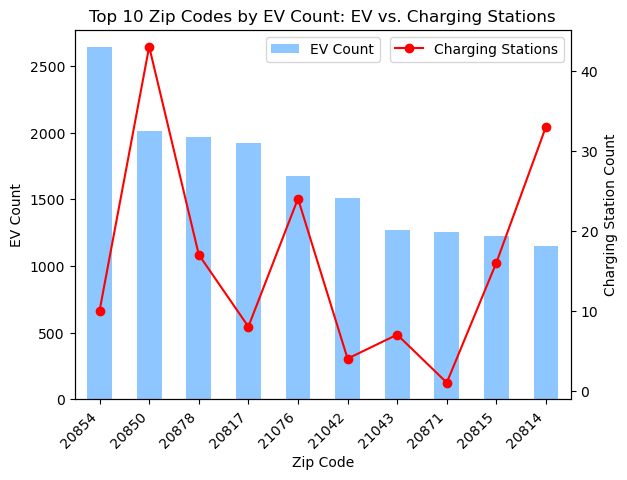

In [101]:
#A double axis chart that compared the charging station count to the EV coint for the top ten zipcodes by ev count
top_ten_bar_chart_df = filtered_merged_all_maryland_df_3.head(10)

fig, ax = plt.subplots()
top_ten_bar_chart_df.plot(kind='bar', x='ZipCode', y='EV Count', ax=ax, color='dodgerblue', alpha=0.5)

ax2 = ax.twinx()
top_ten_bar_chart_df.plot(kind='line', x='ZipCode', y='Charging Stations', ax=ax2, color='r', marker='o')

plt.title('Top 10 Zip Codes by EV Count: EV vs. Charging Stations')
ax.legend(loc="upper center")
ax2.legend(loc="upper right")

ax.set_xlabel('Zip Code')
ax.set_ylabel('EV Count')
ax2.set_ylabel('Charging Station Count')
ax.set_xticklabels(top_ten_bar_chart_df["ZipCode"], rotation=45, ha='right')

plt.savefig("visualizations/ev_combo_chart.png")
plt.show()

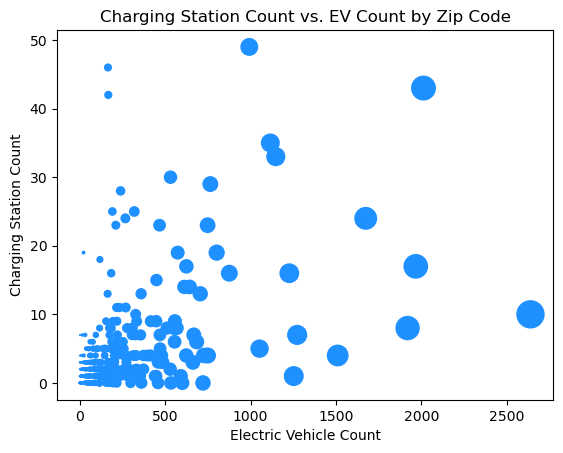

In [102]:
#Scatter plot showing the relatioship between charging station count and EV count by zip code
ev = filtered_merged_all_maryland_df_3['EV Count']
cs = filtered_merged_all_maryland_df_3['Charging Stations']

plt.scatter(ev, cs, marker='o', color='dodgerblue', s=ev/7)
plt.title('Charging Station Count vs. EV Count by Zip Code')
plt.xlabel('Electric Vehicle Count')
plt.ylabel('Charging Station Count')

plt.savefig("visualizations/ev_scatter_chart.png")
plt.show()

In [98]:
#Filtered df for zipcodes where there are zero chargin stations
filtered_merged_maryland_zero_cs_df = filtered_merged_all_maryland_df_3.loc[(filtered_merged_all_maryland_df_3['Charging Stations'] == 0)]
top_ten_zero_cs_bar_chart_df = filtered_merged_maryland_zero_cs_df.head(10)
top_ten_zero_cs_bar_chart_df

,ZipCode,EV Count,Charging Stations,EV_to_charging_station_ratio
113,20816,722.0,0.0,0.0
227,21146,601.0,0.0,0.0
128,20853,534.0,0.0,0.0
226,21144,459.0,0.0,0.0
146,20882,364.0,0.0,0.0
155,20905,358.0,0.0,0.0
147,20886,298.0,0.0,0.0
238,21163,219.0,0.0,0.0
118,20833,216.0,0.0,0.0
397,21797,201.0,0.0,0.0


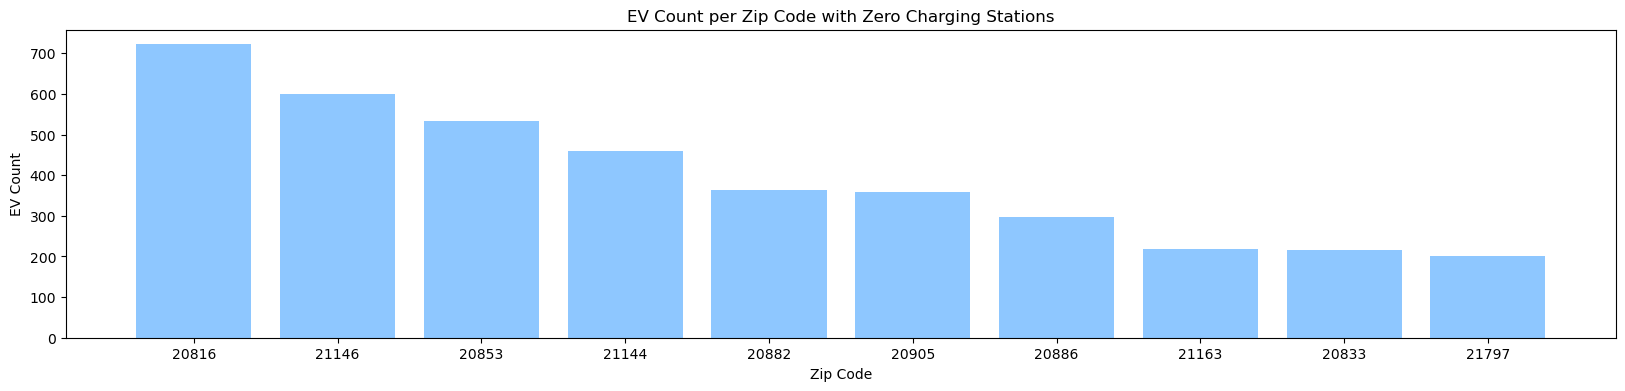

In [99]:
#Bar chart of the top ten zipcodes with zero charging stations
ev_0 = top_ten_zero_cs_bar_chart_df['EV Count']
cs_0 = top_ten_zero_cs_bar_chart_df['Charging Stations']
zipcode_0 = top_ten_zero_cs_bar_chart_df["ZipCode"]

plt.figure(figsize=(20,4))
plt.bar(zipcode_0, ev_0, color='dodgerblue', alpha=0.5, align="center", label="ZipCode")
plt.title("EV Count per Zip Code with Zero Charging Stations")
plt.xlabel("Zip Code")
plt.ylabel("EV Count")

plt.savefig("visualizations/ev_bar_chart_2.png")
plt.show()

In [105]:
%%capture --no-display

# Configure the map plot
map_1 = clean_public_charging_stations_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = False,
    tiles = "CartoLight",
    frame_height = 500,
    frame_width= 700,
    color= "ZipCode",
    )

map_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (ZipCode)